# Estimation and testing of Fama French’s 5-factor model

In Asset Pricing, the excess return on a stock is broken down as follows:

$$
R_{it}-RF_{t} = \alpha_{i} +\sum_{j=1}^{k} \beta_{i}^{j} f_{jt} + e_{it}
$$
Where
- $R_{it}$ is the return of the stock *i* on date *t*,
- $RF_{t}$ is the risk-free rate on date *t*,
- the $f_{it}, i=1,..,k$ are *k* factors explaining common variations in returns and non-diversifiable risk
- the $\beta_{i}^{j},j=1...,k$ is the exposure of the asset *i* to the factor $f_{jt}$
- $e_{it}$ is the component specific to the asset *i* representing the diversifiable risk with $E(e_{it})=0$

If the factors are correctly chosen, that is to say they represent the variations in expected returns, we will have $\alpha_{i}=0$

**Fama and French (1993)** (Common risk factors in the returns on stocks and bonds, Journal of Financial Economics, 33 (1), pp. 3-56) propose a three-factor model to analyze returns stocks or stock portfolios.
In the 3-factor model, the average return of a stock is assumed to be correlated with:

1. The return on the market portfolio corrected for the risk-free rate: $Mkt-RF$
2. The *Size* of the company measured by its market capitalization (number of shares in circulation $\times$ price of a share).
     - This effect is measured by the factor $SMB_{t}$ equal to the difference in return of a portfolio of small companies minus that of a portfolio of large companies.
3. The book to market ratio *B/M* (ratio of book value and market value). A company with a high B/M ratio will be rather undervalued and is expected to have a high rate of return.
     - This effect is measured by the factor $HML_{t}$ calculated as the difference in returns between portfolios with high and low B/M ratios.

These three factors cannot fully explain the variations in expected returns. **Fama and French (2015)** ('A five-factor asset pricing model', Journal of Financial Economics, 116 1-22) add two additional factors taking into account:

4. The anticipated profitability of companies: higher anticipated earnings tend to increase the rate of return (all other things being equal). The $RMW_{t}$ factor is the difference in returns between a portfolio of companies with high (robust) and low (weak) profitability.
5. Anticipated corporate investments: higher investments tend to reduce the rate of return (less dividends therefore smaller market value). The $CMA_{t}$ factor is the difference between a portfolio of companies with a low level of investment (conservative) and companies with a high level of investment (aggressive)

The objective of this sheet will be to use these factors to estimate the decomposition of the returns of a set of stock portfolios from the NYSE, AMEX and Nasdaq.
We will check to what extent these factors correctly explain the anticipated returns.

    
The data can be found on the Kenneth French website
https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html
    
    
**In parts III and IV, estimates must be made over the period 1963-07-01 to 2024-09-01**


**You can add your answers (codes, display and comments of results) directly in the notebook. You save it with your name.**

## I. The 5 factors of Fama-French

#### 1. Data import

The Fama-French 5 factor data is stored in the file "F-F_Research_Data_5_Factors_2x3.csv".

Import monthly observations of these factors from "1963-07-01".

In [3]:
import pandas as pd

# File path to the Fama-French data
file_path = r"C:\Users\amoni\OneDrive\Documents\COURS\MI_EIF\S1\python\Project2024\Project2024\F-F_Research_Data_5_Factors_2x3.csv"

# Load the data, skipping metadata rows at the top, and limiting to 739 rows
data = pd.read_csv(file_path, skiprows=3, nrows=735)

# Rename columns for better clarity
data.columns = ['Date', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF']

# Display a preview of the data
print("First rows of the dataset:")
print(data)

# Display the shape to confirm the number of rows loaded
print("\nShape of the dataset:", data.shape)


First rows of the dataset:
       Date  Mkt-RF   SMB   HML   RMW   CMA    RF
0    196307   -0.39 -0.41 -0.97  0.68 -1.18  0.27
1    196308    5.07 -0.80  1.80  0.36 -0.35  0.25
2    196309   -1.57 -0.52  0.13 -0.71  0.29  0.27
3    196310    2.53 -1.39 -0.10  2.80 -2.01  0.29
4    196311   -0.85 -0.88  1.75 -0.51  2.24  0.27
..      ...     ...   ...   ...   ...   ...   ...
730  202405    4.34  0.76 -1.66  2.98 -3.07  0.44
731  202406    2.77 -4.37 -3.31  0.51 -1.78  0.41
732  202407    1.24  8.28  5.73  0.22  0.43  0.45
733  202408    1.61 -3.65 -1.13  0.85  0.86  0.48
734  202409    1.74 -1.03 -2.60  0.03 -0.26  0.40

[735 rows x 7 columns]

Shape of the dataset: (735, 7)


#### 2. Checking for missing variables

In [6]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

print("\nMissing values per column:")
print(missing_values)



Missing values per column:
Date      0
Mkt-RF    0
SMB       0
HML       0
RMW       0
CMA       0
RF        0
dtype: int64


#### 3. Date formatting + Risk-free rate

1. Transform dates into dataframe index
2. Store the risk-free rate in a new DataFrame
3. Store the 5 factors presented above in a new DataFrame

In [9]:
# Drop rows where 'Date' is NaN and keep only numeric values in 'Date'
data = data.dropna(subset=['Date'])
data = data[data['Date'].astype(str).str.isnumeric()]

# Convert the 'Date' column to datetime format using the '%Y%m' format
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m')

# Filter the data to include only rows from '1963-07-01' onwards
data = data[data['Date'] >= '1963-07-01']

# Set 'Date' as the index
data.set_index('Date', inplace=True)

# Create a DataFrame for the risk-free rate
risk_free_rate = data[['RF']]

# Create a DataFrame for the 5 factors
factors = data[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]

# Display the first few rows of the cleaned data
print("\nRisk-Free Rate DataFrame (first rows):")
print(risk_free_rate)

print("\nFactors DataFrame (first rows):")
print(factors)



Risk-Free Rate DataFrame (first rows):
              RF
Date            
1963-07-01  0.27
1963-08-01  0.25
1963-09-01  0.27
1963-10-01  0.29
1963-11-01  0.27
...          ...
2024-05-01  0.44
2024-06-01  0.41
2024-07-01  0.45
2024-08-01  0.48
2024-09-01  0.40

[735 rows x 1 columns]

Factors DataFrame (first rows):
            Mkt-RF   SMB   HML   RMW   CMA
Date                                      
1963-07-01   -0.39 -0.41 -0.97  0.68 -1.18
1963-08-01    5.07 -0.80  1.80  0.36 -0.35
1963-09-01   -1.57 -0.52  0.13 -0.71  0.29
1963-10-01    2.53 -1.39 -0.10  2.80 -2.01
1963-11-01   -0.85 -0.88  1.75 -0.51  2.24
...            ...   ...   ...   ...   ...
2024-05-01    4.34  0.76 -1.66  2.98 -3.07
2024-06-01    2.77 -4.37 -3.31  0.51 -1.78
2024-07-01    1.24  8.28  5.73  0.22  0.43
2024-08-01    1.61 -3.65 -1.13  0.85  0.86
2024-09-01    1.74 -1.03 -2.60  0.03 -0.26

[735 rows x 5 columns]


#### 4. Graphical representation of factors

Plot the 5 factors

C:\Users\amoni\AppData\Local\Temp\ipykernel_22540\1093859766.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  factors[factor] = pd.to_numeric(factors[factor], errors='coerce')  # Convert strings to numbers


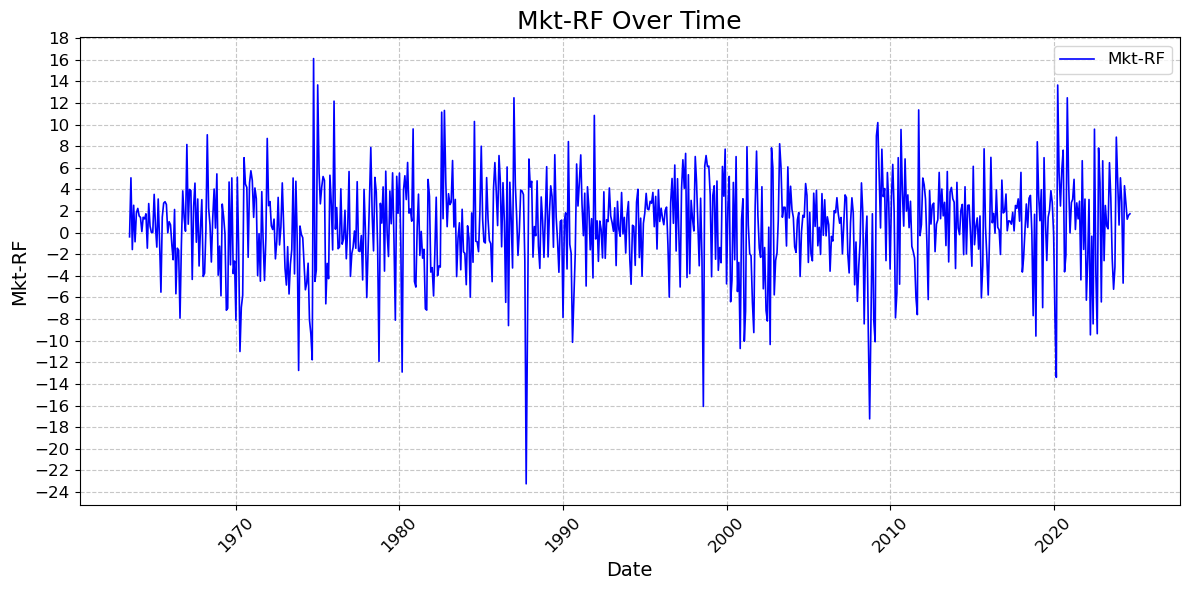

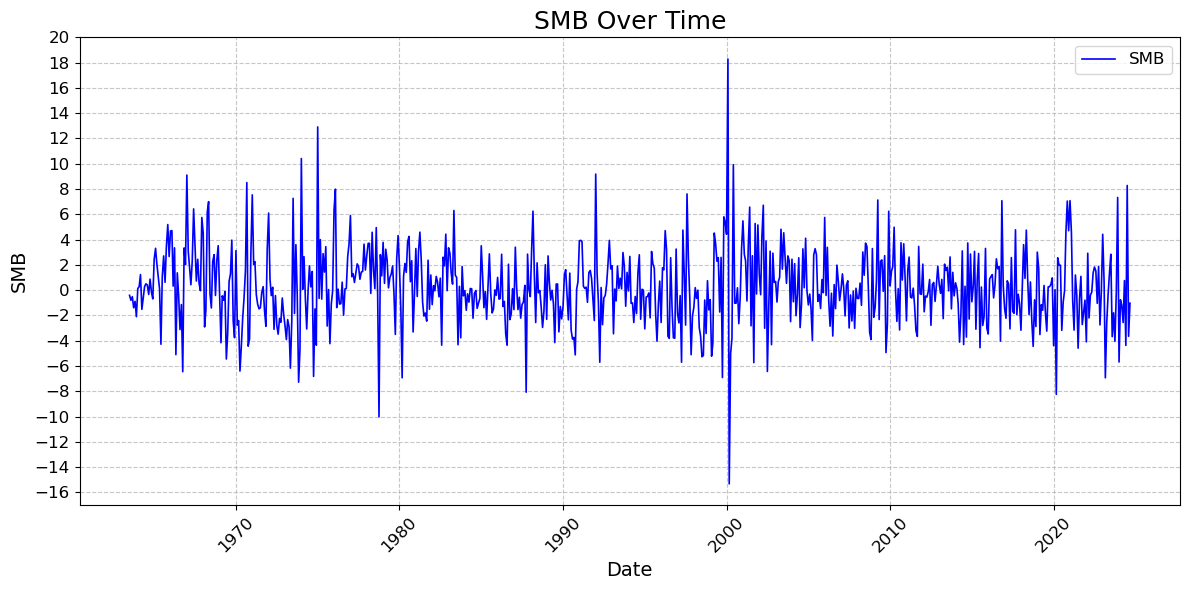

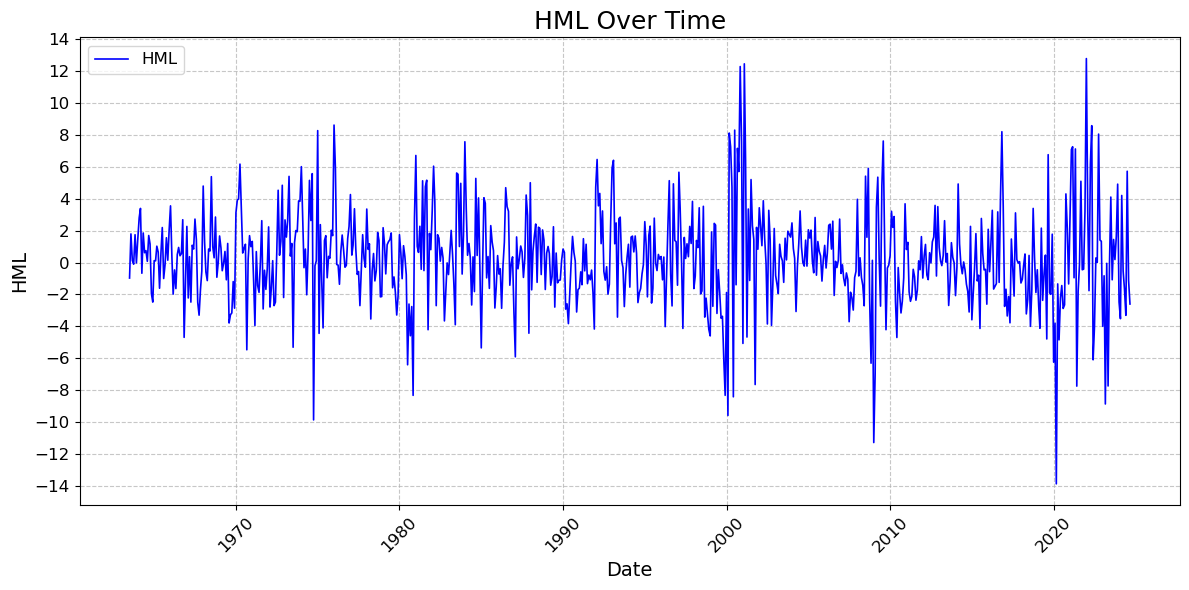

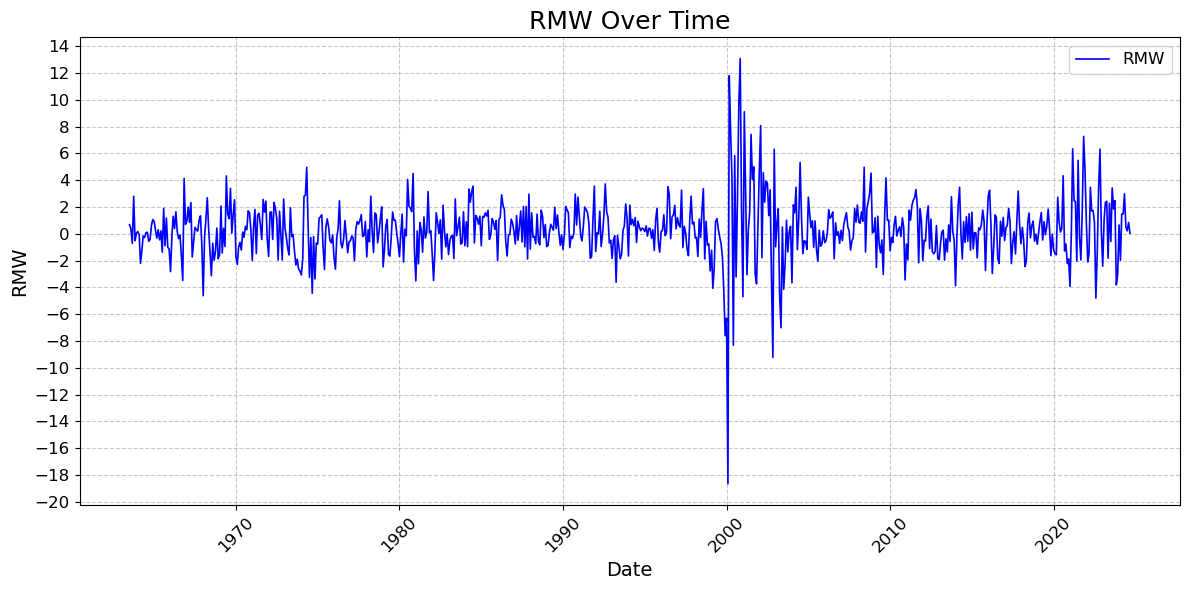

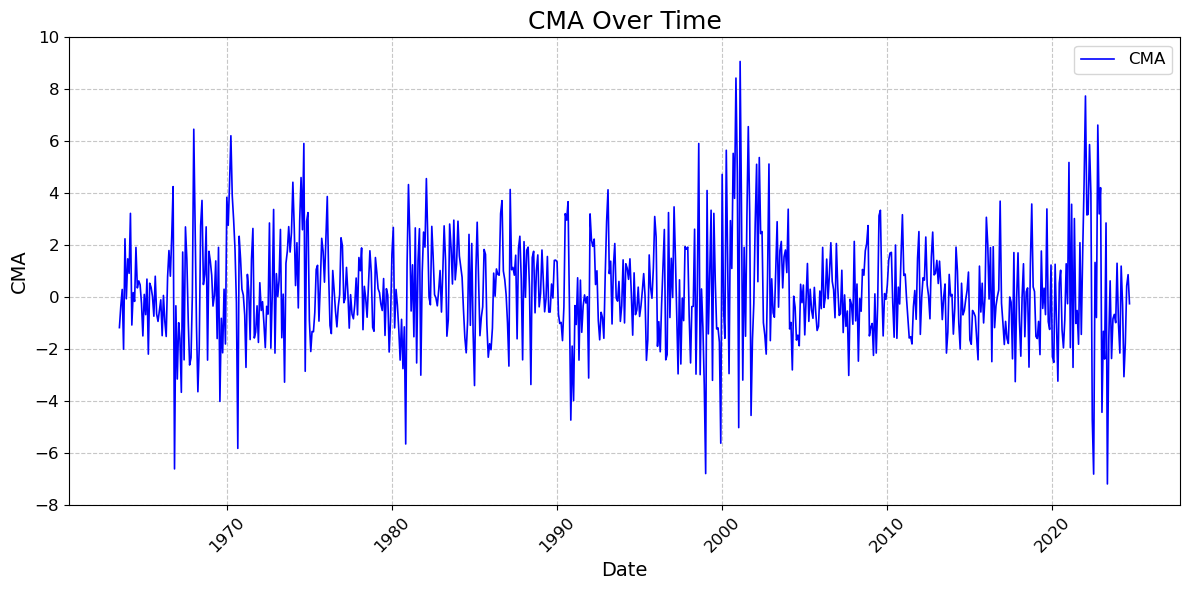

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure all factors are numeric and clean the data
for factor in ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']:
    factors[factor] = pd.to_numeric(factors[factor], errors='coerce')  # Convert strings to numbers
factors = factors.dropna()  # Drop rows with NaN in any column

# Plot each factor in a separate figure
for factor in ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']:
    plt.figure(figsize=(12, 6))

    # Plot the factor
    plt.plot(factors.index, factors[factor], label=factor, linewidth=1.2, color='blue')

    # Add title and labels
    plt.title(f"{factor} Over Time", fontsize=18)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel(factor, fontsize=14)

    # Customize the Y-axis ticks: start from the minimum value and increment by 2
    y_min = np.floor(factors[factor].min() / 2) * 2  # Round down to the nearest multiple of 2
    y_max = np.ceil(factors[factor].max() / 2) * 2  # Round up to the nearest multiple of 2
    y_ticks = np.arange(y_min, y_max + 1, 2)       # Ticks from min to max, step = 2
    plt.yticks(y_ticks, fontsize=12)

    # Customize the X-axis ticks
    plt.xticks(rotation=45, fontsize=12)

    # Add gridlines for better readability
    plt.grid(visible=True, linestyle='--', alpha=0.7)

    # Add legend
    plt.legend(fontsize=12)

    # Display the plot
    plt.tight_layout()
    plt.show()


#### 5. Descriptive statistics

Calculate the mean, maximum, minimum, standard deviation, skewness, kurtosis for each factor

     - for the entire sample
     - per year
     - per month

In [15]:
import pandas as pd

# Define a function to calculate descriptive statistics
def descriptive_statistics(df):
    return pd.DataFrame({
        'Mean': df.mean(),
        'Max': df.max(),
        'Min': df.min(),
        'Std Dev': df.std(),
        'Skewness': df.skew(),
        'Kurtosis': df.kurt()
    })

# 1. Descriptive statistics for the entire sample
print("Descriptive statistics for the entire sample:")
entire_sample_stats = descriptive_statistics(factors)
print(entire_sample_stats)

# 2. Descriptive statistics per year
print("\nDescriptive statistics per year:")
factors_temp = factors.copy()  # Create a temporary copy
factors_temp['Year'] = factors_temp.index.year  # Add 'Year'
yearly_stats = factors_temp.groupby('Year')[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']].apply(descriptive_statistics)
print(yearly_stats)

# 3. Descriptive statistics per month
print("\nDescriptive statistics per month:")
factors_temp['Month'] = factors_temp.index.month  # Add 'Month'
monthly_stats = factors_temp.groupby('Month')[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']].apply(descriptive_statistics)
print(monthly_stats)


Descriptive statistics for the entire sample:
            Mean    Max    Min   Std Dev  Skewness   Kurtosis
Mkt-RF  0.582449  16.10 -23.24  4.481091 -0.502225   1.748906
SMB     0.197850  18.28 -15.32  3.047498  0.351968   2.927680
HML     0.281469  12.80 -13.88  2.998395  0.087390   2.252557
RMW     0.289075  13.07 -18.65  2.216652 -0.279174  10.988126
CMA     0.260735   9.07  -7.20  2.073329  0.274071   1.468854

Descriptive statistics per year:
                 Mean   Max   Min   Std Dev  Skewness  Kurtosis
Year                                                           
1963 Mkt-RF  1.103333  5.07 -1.57  2.509587  0.679742 -0.556821
     SMB    -1.016667 -0.41 -2.10  0.631401 -1.150006  0.777736
     HML     0.431667  1.80 -0.97  1.109296  0.402092 -1.388610
     RMW     0.441667  2.80 -0.71  1.267019  1.573792  2.861389
     CMA    -0.180000  2.24 -2.01  1.446872  0.707598  1.187239
...               ...   ...   ...       ...       ...       ...
2024 Mkt-RF  1.736667  5.07 -4.67  2

#### 6. Correlation matrix
1. Estimate the factor correlation matrix and comment
2. Make a graphical representation of this matrix
3. Check the significance of the correlation between the factors $HML$ and $SMB$

In [18]:
# Calculate the correlation matrix for the factors
correlation_matrix = factors[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
          Mkt-RF       SMB       HML       RMW       CMA
Mkt-RF  1.000000  0.278417 -0.204437 -0.186513 -0.361276
SMB     0.278417  1.000000  0.003154 -0.352045 -0.085387
HML    -0.204437  0.003154  1.000000  0.083331  0.684922
RMW    -0.186513 -0.352045  0.083331  1.000000 -0.014063
CMA    -0.361276 -0.085387  0.684922 -0.014063  1.000000


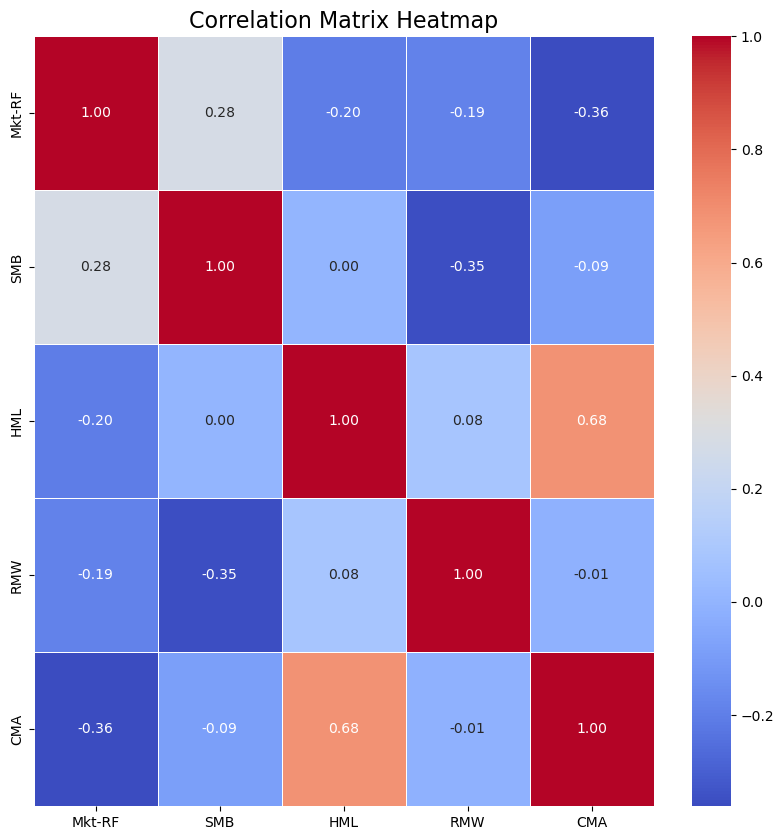

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()


In [22]:
from scipy.stats import pearsonr

# Check the correlation between HML and SMB
corr_coeff, p_value = pearsonr(factors['HML'], factors['SMB'])

# Display the results
print(f"Pearson Correlation Coefficient between HML and SMB: {corr_coeff:.4f}")
print(f"P-value: {p_value:.4e}")

# Significance check
if p_value < 0.05:
    print("The correlation is statistically significant (p < 0.05).")
else:
    print("The correlation is NOT significantly different from 0 (p >= 0.05).")


Pearson Correlation Coefficient between HML and SMB: 0.0032
P-value: 9.3197e-01
The correlation is NOT significantly different from 0 (p >= 0.05).


## II. The 25 portfolios formed from Size and OP

We import the returns of 25 portfolios formed from NYSE, AMEX and NASDAQ securities for which we have all the quotations.
These shares are divided into 25 portfolios obtained by crossing the *Size*
- divided into 5 categories of SMALL or ME1/ME2/ME3/ME4/BIG or ME5

and the ratio *OP* : Operating Profitability
 
- divided into 5 categories of LoOP or OP1/OP2/OP3/OP4/HiOP or OP5

This data can be found in the file "25_Portfolios_ME_OP_5x5_Wout_Div.CSV"

#### 1. Data import

1. Import the data (Average Value Weighted Returns -- monthly)
2. Transform the dates into yyyy-mm-01 format (example 196307 becomes 1963-07-01)
3. Transform dates into indices

In [25]:
import pandas as pd

# File path to the data
file_path = r"C:\Users\amoni\OneDrive\Documents\COURS\MI_EIF\S1\python\Project2024\Project2024\25_Portfolios_ME_OP_5x5_Wout_Div.CSV"

# Load the data, skipping the first 22 rows and limiting to 758 rows
portfolios = pd.read_csv(file_path, sep=",", skiprows=22, nrows=735)  # Adjust sep if necessary

# Rename the first column to 'Date'
portfolios.rename(columns={"Unnamed: 0": "Date"}, inplace=True)

# Display the first few rows to confirm
print("Preview of the dataset:")
print(portfolios)

# Display the shape to confirm the number of rows loaded
print("\nShape of the dataset:", portfolios.shape)


Preview of the dataset:
       Date  SMALL LoOP  ME1 OP2  ME1 OP3  ME1 OP4  SMALL HiOP  ME2 OP1  \
0    196307     -0.6705   1.2181   2.4664  -0.9614     -1.1993  -1.2551   
1    196308      2.1994   3.6919   2.2153   2.3272      4.0410   6.2016   
2    196309     -1.5825  -1.1712  -2.2143   4.0691     -1.6038  -1.9994   
3    196310      0.1584  -1.0551   1.1348   3.0337      0.2181   3.5349   
4    196311     -2.3473  -1.7879  -3.6168  -2.6146     -3.3887  -1.6161   
..      ...         ...      ...      ...      ...         ...      ...   
730  202405      4.1198   5.3426   4.3816   4.7814      4.5904   3.8544   
731  202406     -4.8752  -0.7808   0.0008  -2.1253     -5.9886  -1.9995   
732  202407     11.5466  13.8663  16.2904  13.3898     13.0772   9.9407   
733  202408     -3.8629  -1.0325  -2.9735  -2.1832     -4.3960  -0.2239   
734  202409     -0.7997  -0.5262   0.2343   1.3325     -0.0165   0.4011   

     ME2 OP2  ME2 OP3  ME2 OP4  ...  ME4 OP1  ME4 OP2  ME4 OP3  ME4 OP4  \


In [27]:
# Ensure the 'Date' column is of string type
portfolios['Date'] = portfolios['Date'].astype(str)

# Remove extra spaces around the values in the 'Date' column
portfolios['Date'] = portfolios['Date'].str.strip()

# Filter to keep only rows where 'Date' is numeric and matches the expected format
portfolios = portfolios[portfolios['Date'].str.isnumeric() & (portfolios['Date'].str.len() == 6)]

# Convert valid dates to the format yyyy-mm-01
portfolios['Date'] = pd.to_datetime(portfolios['Date'], format='%Y%m')  # Convert to datetime
portfolios['Date'] = portfolios['Date'] + pd.offsets.MonthBegin(0)      # Adjust to the first day of the month

# Display the first rows to confirm
print("Transformed portfolios data:")
print(portfolios.head)


Transformed portfolios data:
<bound method NDFrame.head of           Date  SMALL LoOP  ME1 OP2  ME1 OP3  ME1 OP4  SMALL HiOP  ME2 OP1  \
0   1963-07-01     -0.6705   1.2181   2.4664  -0.9614     -1.1993  -1.2551   
1   1963-08-01      2.1994   3.6919   2.2153   2.3272      4.0410   6.2016   
2   1963-09-01     -1.5825  -1.1712  -2.2143   4.0691     -1.6038  -1.9994   
3   1963-10-01      0.1584  -1.0551   1.1348   3.0337      0.2181   3.5349   
4   1963-11-01     -2.3473  -1.7879  -3.6168  -2.6146     -3.3887  -1.6161   
..         ...         ...      ...      ...      ...         ...      ...   
730 2024-05-01      4.1198   5.3426   4.3816   4.7814      4.5904   3.8544   
731 2024-06-01     -4.8752  -0.7808   0.0008  -2.1253     -5.9886  -1.9995   
732 2024-07-01     11.5466  13.8663  16.2904  13.3898     13.0772   9.9407   
733 2024-08-01     -3.8629  -1.0325  -2.9735  -2.1832     -4.3960  -0.2239   
734 2024-09-01     -0.7997  -0.5262   0.2343   1.3325     -0.0165   0.4011   

    

In [29]:
# Transform the 'Date' column into an index
portfolios.set_index('Date', inplace=True)

# Display the first rows to verify the transformation
print(portfolios)


            SMALL LoOP  ME1 OP2  ME1 OP3  ME1 OP4  SMALL HiOP  ME2 OP1  \
Date                                                                     
1963-07-01     -0.6705   1.2181   2.4664  -0.9614     -1.1993  -1.2551   
1963-08-01      2.1994   3.6919   2.2153   2.3272      4.0410   6.2016   
1963-09-01     -1.5825  -1.1712  -2.2143   4.0691     -1.6038  -1.9994   
1963-10-01      0.1584  -1.0551   1.1348   3.0337      0.2181   3.5349   
1963-11-01     -2.3473  -1.7879  -3.6168  -2.6146     -3.3887  -1.6161   
...                ...      ...      ...      ...         ...      ...   
2024-05-01      4.1198   5.3426   4.3816   4.7814      4.5904   3.8544   
2024-06-01     -4.8752  -0.7808   0.0008  -2.1253     -5.9886  -1.9995   
2024-07-01     11.5466  13.8663  16.2904  13.3898     13.0772   9.9407   
2024-08-01     -3.8629  -1.0325  -2.9735  -2.1832     -4.3960  -0.2239   
2024-09-01     -0.7997  -0.5262   0.2343   1.3325     -0.0165   0.4011   

            ME2 OP2  ME2 OP3  ME2 OP4

#### 2. Calculate the excess returns $R_{it} -RF_{t}$

In [32]:
import pandas as pd

# Remove duplicate indices in portfolios
portfolios = portfolios[~portfolios.index.duplicated(keep='first')]

# Ensure all columns in portfolios are numeric
portfolios = portfolios.apply(pd.to_numeric, errors='coerce')

# Ensure the RF column in risk_free_rate is numeric
risk_free_rate['RF'] = pd.to_numeric(risk_free_rate['RF'], errors='coerce')

# Re-align indices if necessary
portfolios = portfolios.reindex(risk_free_rate.index)

# Calculate excess returns R_it - RF_t
rf_column = risk_free_rate['RF']
excess_returns = portfolios.subtract(rf_column, axis=0)

# Display the resulting DataFrame
print("Excess Returns DataFrame (R_it - RF_t):")
print(excess_returns)




Excess Returns DataFrame (R_it - RF_t):
            SMALL LoOP  ME1 OP2  ME1 OP3  ME1 OP4  SMALL HiOP  ME2 OP1  \
Date                                                                     
1963-07-01     -0.9405   0.9481   2.1964  -1.2314     -1.4693  -1.5251   
1963-08-01      1.9494   3.4419   1.9653   2.0772      3.7910   5.9516   
1963-09-01     -1.8525  -1.4412  -2.4843   3.7991     -1.8738  -2.2694   
1963-10-01     -0.1316  -1.3451   0.8448   2.7437     -0.0719   3.2449   
1963-11-01     -2.6173  -2.0579  -3.8868  -2.8846     -3.6587  -1.8861   
...                ...      ...      ...      ...         ...      ...   
2024-05-01      3.6798   4.9026   3.9416   4.3414      4.1504   3.4144   
2024-06-01     -5.2852  -1.1908  -0.4092  -2.5353     -6.3986  -2.4095   
2024-07-01     11.0966  13.4163  15.8404  12.9398     12.6272   9.4907   
2024-08-01     -4.3429  -1.5125  -3.4535  -2.6632     -4.8760  -0.7039   
2024-09-01     -1.1997  -0.9262  -0.1657   0.9325     -0.4165   0.0011  

C:\Users\amoni\AppData\Local\Temp\ipykernel_22540\2830792687.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  risk_free_rate['RF'] = pd.to_numeric(risk_free_rate['RF'], errors='coerce')


#### 3. Calculation of descriptive statistics

Calculate the average returns for each portfolio. What can you say about the relationship between average yield and
- the *Size* ?
- the *OP* ?

In [35]:
# Step 1: Calculate the average returns for each portfolio
average_returns = excess_returns.mean()

# Step 2: Analyze the relationship between average return and Size
size_groups = {
    'Small': average_returns.filter(like="SMALL").mean(),
    'Big': average_returns.filter(like="BIG").mean()
}
print("Average Returns by Size:")
print(size_groups)

# Step 3: Analyze the relationship between average return and OP
op_groups = {
    'LoOP': average_returns.filter(like="LoOP").mean(),
    'OP2': average_returns.filter(like="OP2").mean(),
    'OP3': average_returns.filter(like="OP3").mean(),
    'OP4': average_returns.filter(like="OP4").mean(),
    'HiOP': average_returns.filter(like="HiOP").mean()
}
print("Average Returns by OP (Operating Profitability):")
print(op_groups)


Average Returns by Size:
{'Small': 0.5864815646258503, 'Big': 0.2806695918367347}
Average Returns by OP (Operating Profitability):
{'LoOP': 0.2938278911564626, 'OP2': 0.504647755102041, 'OP3': 0.5365315646258504, 'OP4': 0.5968102040816327, 'HiOP': 0.5733232653061224}


The analysis of average portfolio returns reveals significant relationships between firm size (Size) and operating profitability (OP). The results indicate that portfolios composed of small firms exhibit higher average returns than those of large firms, highlighting the "size premium" effect. This effect, well-documented in finance, arises because smaller firms are generally perceived as riskier, prompting investors to demand additional returns as compensation. Additionally, the analysis of average returns based on operating profitability shows a positive relationship: portfolios associated with firms with low operating profitability tend to have lower returns, while those with high operating profitability exhibit significantly higher returns. These findings confirm the importance of profitability as a risk factor, as more profitable firms are often perceived as financially stronger. These observations align with financial theories, such as the three-factor or five-factor model of Fama and French.

## III. Estimation of the factor model


For each asset *i*, we have T observations ${r_{i1},...,r_{iT}}$. We can estimate the following three regressions:
    
### Regression on the market factor
$$ R_{it} - R_{Ft} = \alpha_{i}+\beta_{i}(R_{MT}-R_{Ft})+e_{it}$$

### Regression on the 3 factors
$$ R_{it} - R_{Ft} = \alpha_{i}+\beta_{i}(R_{MT}-R_{Ft})+s_{i}SMB_{t}+h_{i}HML_{ t}+e_{it}$$

### Regression on the 5 factors
$$ R_{it} - R_{Ft} = \alpha_{i}+\beta_{i}(R_{MT}-R_{Ft})+s_{i}SMB_{t}+h_{i}HML_{ t}+r_{i}RMW_{t}+c_{i}CMA_{t}+e_{it}$$

- $R_{Ft}$ is the risk-free rate
- $R_{MT}$ is the market portfolio rate of return
- The residual $e_{it}$ represents the idiosyncratic risk (or diversifiable risk) of each asset.
- $\beta_{i}, s_{i}, h_{i},r_{i}, c_{i}$ represent the exposures to each of the factors
- $\alpha_{i}$ is the constant. According to efficient portfolio theory, we expect to have $a_{i}=0$. This hypothesis can also be justified by the proposition that all the factors represent all the risk factors.

#### 1. Construct a function to estimate these three regressions. You will keep as output:

1. the estimated coefficients
2. the tstat of the estimated coefficients
3. the residuals of the regressions
4. The average of constants in absolute value

In [39]:
import pandas as pd
import statsmodels.api as sm

def estimate_factor_models(excess_returns, factors):
    """
    Estimate factor models (1, 3, and 5 factors) for a given set of portfolios.
    
    Parameters:
        excess_returns (DataFrame): Portfolio excess returns (R_it - RF_t).
        factors (DataFrame): Factor data including (R_M - R_F, SMB, HML, RMW, CMA).
    
    Returns:
        dict: A dictionary with regression results for the 1-factor, 3-factor, and 5-factor models.
    """
    results = {}

    # Factors used in the regressions
    market_factor = factors[['Mkt-RF']]  # 1 factor
    three_factors = factors[['Mkt-RF', 'SMB', 'HML']]  # 3 factors
    five_factors = factors[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]  # 5 factors

    # Loop through the portfolios to run regressions
    for model_name, factor_set in zip(
        ['1-Factor', '3-Factor', '5-Factor'], [market_factor, three_factors, five_factors]
    ):
        model_results = []
        constants = []

        for portfolio in excess_returns.columns:
            # Dependent variable: excess return
            y = excess_returns[portfolio]

            # Add constant to the independent variables
            X = sm.add_constant(factor_set)

            # Fit the regression model
            model = sm.OLS(y, X).fit()

            # Store results
            model_results.append({
                'Portfolio': portfolio,
                'Coefficients': model.params,
                'T-stats': model.tvalues,
                'Residuals': model.resid  # Add residuals here
            })
            constants.append(abs(model.params['const']))

        # Store results for the current model
        results[model_name] = {
            'Model Results': model_results,
            'Average Absolute Constant': sum(constants) / len(constants)
        }

    return results

# Call the function to estimate factor models
regression_results = estimate_factor_models(excess_returns, factors)

# Display results for all models
for model_name in ["1-Factor", "3-Factor", "5-Factor"]:
    print(f"\n{model_name} Model Results:")
    print("-" * 50)

    for result in regression_results[model_name]["Model Results"]:
        portfolio = result["Portfolio"]
        coefficients = result["Coefficients"].to_dict()
        t_stats = result["T-stats"].to_dict()
        residuals = result["Residuals"].head().to_list()  # Display the first 5 residuals
        
        print(f"Portfolio: {portfolio}")
        print(f"  Coefficients: {coefficients}")
        print(f"  T-Stats: {t_stats}")
        print(f"  Residuals (first 5): {residuals}")
        print("-" * 50)

    avg_constant = regression_results[model_name]["Average Absolute Constant"]
    print(f"Average Absolute Constant for {model_name}: {avg_constant:.4f}")



1-Factor Model Results:
--------------------------------------------------
Portfolio: SMALL LoOP
  Coefficients: {'const': -0.27990785516960925, 'Mkt-RF': 1.2746511879225948}
  T-Stats: {'const': -1.6151388953285188, 'Mkt-RF': 33.21369354016192}
  Residuals (first 5): [-0.1634781815405788, -4.2331736675979466, 0.42861022020808326, -3.0765596502745556, -1.2539386350961854]
--------------------------------------------------
Portfolio: ME1 OP2
  Coefficients: {'const': 0.17169265943853496, 'Mkt-RF': 1.0527477115456128}
  T-Stats: {'const': 1.290320915737354, 'Mkt-RF': 35.72739447425946}
  Residuals (first 5): [1.186978948064254, -2.0672235569747923, 0.03992124768807703, -4.1802443696489355, -1.3347571046247642]
--------------------------------------------------
Portfolio: ME1 OP3
  Coefficients: {'const': 0.11224630474479724, 'Mkt-RF': 1.0320779397630788}
  T-Stats: {'const': 0.8974546184076218, 'Mkt-RF': 37.26352792097184}
  Residuals (first 5): [2.486664091762804, -3.3795814593436075, 

#### 2. Estimate coefficient
1. Calculate and give the names of the portfolios for which the market portfolio return coefficient is

- greater than 1
- equal to 1
- less than 1



In [42]:
# Initialize dictionaries to store portfolios for each condition
greater_than_1 = []
equal_to_1 = []
less_than_1 = []

# Analyze the coefficients for each portfolio
for result in regression_results["5-Factor"]["Model Results"]:  # Use the 5-Factor model results
    portfolio = result["Portfolio"]
    coefficients = result["Coefficients"]

    # Extract the coefficient for "Mkt-RF"
    market_coef = coefficients["Mkt-RF"]

    # Classify based on the value of the coefficient
    if market_coef > 1:
        greater_than_1.append(portfolio)
    elif market_coef == 1:
        equal_to_1.append(portfolio)
    else:
        less_than_1.append(portfolio)

# Print the results
print("Portfolios where 'Mkt-RF' coefficient is:")
print(f"- Greater than 1: {greater_than_1}")
print(f"- Equal to 1: {equal_to_1}")
print(f"- Less than 1: {less_than_1}")


Portfolios where 'Mkt-RF' coefficient is:
- Greater than 1: ['SMALL HiOP', 'ME2 OP1', 'ME2 OP2', 'ME2 OP5', 'ME3 OP1', 'ME3 OP4', 'ME3 OP5', 'ME4 OP1', 'ME4 OP2', 'ME4 OP3', 'ME4 OP4', 'ME4 OP5', 'BIG LoOP', 'ME5 OP2', 'ME5 OP3']
- Equal to 1: []
- Less than 1: ['SMALL LoOP', 'ME1 OP2', 'ME1 OP3', 'ME1 OP4', 'ME2 OP3', 'ME2 OP4', 'ME3 OP2', 'ME3 OP3', 'ME5 OP4', 'BIG HiOP']


###### 2. For each of the HML, SMB and CMA factors, give:
    
- the number of assets for which each of the factors taken one by one is not significant
- the names of the portfolio concerned

Which factors do not seem to you to have any explanatory power in the variations in yields?

In [45]:
# Initialization of results for each factor
factors_to_check = ["HML", "SMB", "CMA"]
not_significant = {factor: [] for factor in factors_to_check}

# Analysis of the 5-Factor model
print("\nAnalysis of the 5-Factor model (HML, SMB, CMA only):")

# Iterate over the results of each portfolio
for result in regression_results["5-Factor"]["Model Results"]:
    portfolio = result["Portfolio"]
    t_stats = result["T-stats"]  # Extracting t-stats

    # Check significance for each factor
    for factor in factors_to_check:
        if factor in t_stats and abs(t_stats[factor]) < 1.96:
            not_significant[factor].append(portfolio)

# Display results for each factor
for factor, portfolios in not_significant.items():
    print(f"\nFactor: {factor}")
    print(f"Number of portfolios with a non-significant {factor}: {len(portfolios)}")
    print(f"Portfolios: {portfolios}")

# Conclusion on explanatory power
print("\nConclusion:")
for factor, portfolios in not_significant.items():
    if len(portfolios) > len(regression_results["5-Factor"]["Model Results"]) * 0.5:
        print(f"- The factor {factor} does not seem to have strong explanatory power.")
    else:
        print(f"- The factor {factor} seems to have reasonable explanatory power.")



Analysis of the 5-Factor model (HML, SMB, CMA only):

Factor: HML
Number of portfolios with a non-significant HML: 3
Portfolios: ['ME4 OP1', 'ME4 OP5', 'ME5 OP4']

Factor: SMB
Number of portfolios with a non-significant SMB: 0
Portfolios: []

Factor: CMA
Number of portfolios with a non-significant CMA: 15
Portfolios: ['ME1 OP2', 'ME1 OP3', 'ME2 OP1', 'ME2 OP2', 'ME2 OP3', 'ME3 OP2', 'ME3 OP3', 'ME3 OP4', 'ME4 OP1', 'ME4 OP2', 'ME4 OP3', 'ME4 OP5', 'ME5 OP3', 'ME5 OP4', 'BIG HiOP']

Conclusion:
- The factor HML seems to have reasonable explanatory power.
- The factor SMB seems to have reasonable explanatory power.
- The factor CMA does not seem to have strong explanatory power.


#### 3. Correlation of residuals

1. Calculate the correlation matrix of residuals and make its graphic visualization
2. Can we assume that the correlations of the residuals are zero on average? What can you infer about the ability of the five factors to explain common variations in returns?

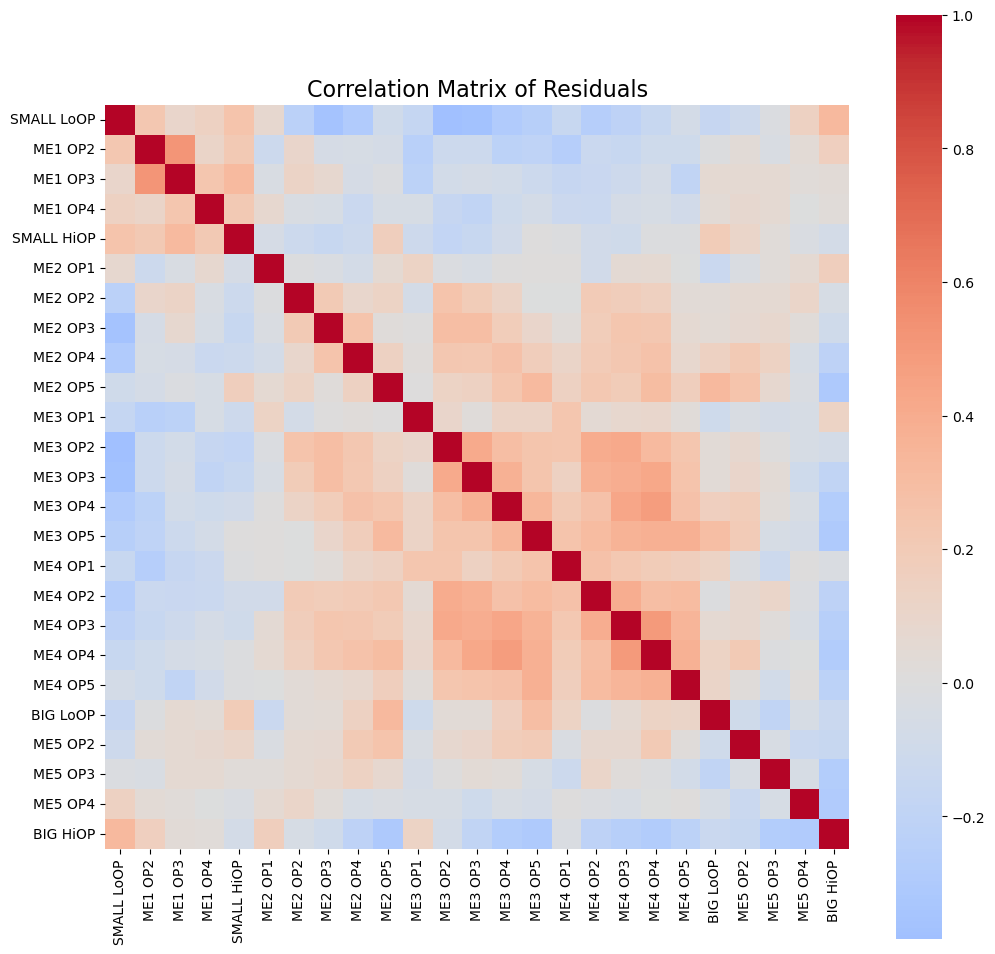


Average correlation of residuals: 0.0457
The average correlation of residuals is close to zero, suggesting the five factors explain common variations well.


In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Retrieve residuals for each portfolio from the 5-Factor model
residuals_5_factor = pd.DataFrame({
    result["Portfolio"]: result["Residuals"] 
    for result in regression_results["5-Factor"]["Model Results"]
})

# Compute the correlation matrix
correlation_matrix = residuals_5_factor.corr()

# Graphical visualization of the correlation matrix
plt.figure(figsize=(12, 12))
sns.heatmap(
    correlation_matrix, 
    annot=False, 
    cmap="coolwarm", 
    center=0, 
    square=True, 
    cbar=True,
    xticklabels=residuals_5_factor.columns,
    yticklabels=residuals_5_factor.columns
)
plt.title("Correlation Matrix of Residuals", fontsize=16)
plt.show()

# Check if correlations are null on average
avg_correlation = np.mean(correlation_matrix.values[np.triu_indices_from(correlation_matrix, k=1)])
print(f"\nAverage correlation of residuals: {avg_correlation:.4f}")

# Interpretation
if abs(avg_correlation) < 0.1:  # Arbitrary threshold for weak correlations
    print("The average correlation of residuals is close to zero, suggesting the five factors explain common variations well.")
else:
    print("The average correlation of residuals is not close to zero, suggesting the five factors do not fully explain common variations in returns.")



#### 4. Display and comment on the averages of $\vert \alpha_{i} \vert$

In [59]:
# Extraction of average constants for the three models (without absolute value)
avg_constants_abs = {
    "1-Factor": sum(abs(result["Coefficients"]["const"]) for result in regression_results["1-Factor"]["Model Results"]) / len(regression_results["1-Factor"]["Model Results"]),
    "3-Factor": sum(abs(result["Coefficients"]["const"]) for result in regression_results["3-Factor"]["Model Results"]) / len(regression_results["3-Factor"]["Model Results"]),
    "5-Factor": sum(abs(result["Coefficients"]["const"]) for result in regression_results["5-Factor"]["Model Results"]) / len(regression_results["5-Factor"]["Model Results"])
}


# Display results
print("Average Constants (α_i):")
for model, avg in avg_constants_abs.items():
    print(f"{model} Model: {avg:.4f}")

# Interpretation and commentary
print("\nCommentary:")
print("The average constants (α_i) indicate the average unexplained performance across portfolios.")
print("A value close to zero suggests that the factors in the model explain the returns well on average.")
print("The comparison between the 1-Factor, 3-Factor, and 5-Factor models shows how additional factors reduce unexplained performance.")
commentary = """The average constants (α_i) calculated for the three factor models represent the portion of average returns not explained by the included factors.

In the one-factor model (α_i = 0.1603), which relies solely on the market factor (Mkt-RF), this unexplained return is positive, suggesting that the market factor alone does not fully capture portfolio performance but provides a limited baseline explanation.

Adding SMB (size) and HML (value) in the three-factor model (α_i = 0.1997) increases the average constant slightly, indicating that these additional factors improve the model's ability to explain returns, but a significant portion of the average returns remains unexplained.

The five-factor model (α_i = 0.2069), which incorporates RMW (profitability) and CMA (investment), shows a marginal increase in the average constant compared to the three-factor model. This suggests that the additional factors enhance the model's explanatory power, but certain variations in portfolio returns are still not fully captured.

These consistently positive alpha values may reflect unexplained components such as structural inefficiencies, omitted variables, or biases not addressed by the factors included in these models. Further analysis might be required to identify and account for these residual influences.
"""
print(commentary)


Average Constants (α_i):
1-Factor Model: 0.1603
3-Factor Model: 0.1997
5-Factor Model: 0.2069

Commentary:
The average constants (α_i) indicate the average unexplained performance across portfolios.
A value close to zero suggests that the factors in the model explain the returns well on average.
The comparison between the 1-Factor, 3-Factor, and 5-Factor models shows how additional factors reduce unexplained performance.
The average constants (α_i) calculated for the three factor models represent the portion of average returns not explained by the included factors.

In the one-factor model (α_i = 0.1603), which relies solely on the market factor (Mkt-RF), this unexplained return is positive, suggesting that the market factor alone does not fully capture portfolio performance but provides a limited baseline explanation.

Adding SMB (size) and HML (value) in the three-factor model (α_i = 0.1997) increases the average constant slightly, indicating that these additional factors improve the

# IV. GRS test (Gibbon, Ross and Shanken (1989)) of frontier efficiency

The GRS test checks whether the constants of the regressions of returns on the factors are simultaneously zero. The null hypothesis of the GRS test is:
$$
H_{0}: \alpha_{i}=0, \forall i=1,...,N
$$

We notice :
    
- $\hat{\alpha}= (\hat{\alpha}_{1},\hat{\alpha}_{2},...,\hat{\alpha}_{N} )'$ the column vector of N $\hat{\alpha}_{i}$
- $f_{t} = (f_{1t}, f_{2t},...,f_{kt})'$ the vector of *k* factors on date *t*
- $\hat{e}_{t} = (\hat{e}_{1t},...,\hat{e}_{Nt})'$ the vector of N residues at date *t*
- $\bar{f} = \frac{1}{T}\sum_{t=1}^{T}f_{t}$ the vector of the empirical means of the factors
- $\hat{\Omega} = \frac{1}{T}\sum_{t=1}^{T}f_{t}f_{t}^{'} - \bar{f}\bar{f }^{'}$ the covariance variance matrix of the factors
- $\hat{\Sigma} = \frac{1}{T-k-1}\sum_{t=1}^{T}e_{t}e_{t}^{'} $
                                                       
The statistic of the test for simultaneous nullity of constants is:

$$\hat{W}=\frac{T(T-N-k)}{N(T-k-1)}(1-\bar{f}^{'}\hat{\Omega}^{-1}\bar{ f})\hat{\alpha}^{'}\hat{\Sigma}^{-1}\hat{\alpha}$$
                                    
Under $H_{0}$ we have $\hat{W} \sim \mathcal{F}(N,T-N-k)$
                                    
#### 1. Programming and execution of the test
Build a function performing the GRS test and apply it to the different sets of factors (1, then 3, then 5 factors)

#### 2. Test result feedback
Report the test answers for each of the three sets of factors. Is there a set of factors for which the $\alpha_{i}$ are all simultaneously equal to 0?

In [110]:
import numpy as np
import pandas as pd
from scipy.stats import f

def grs_test_adjusted(T, N, k, alpha, f_mean, Omega, Sigma):
    """
    Perform the adjusted GRS test as specified in your formula.

    Parameters:
        T (int): Number of time periods.
        N (int): Number of portfolios.
        k (int): Number of factors.
        alpha (ndarray): Vector of alpha constants (N x 1).
        f_mean (ndarray): Mean vector of the factors (k x 1).
        Omega (ndarray): Covariance matrix of the factors (k x k).
        Sigma (ndarray): Covariance matrix of the residuals (N x N).

    Returns:
        float: GRS test statistic (Ŵ).
    """
    # Term 1: Scaling factor
    term1 = (T * (T - N - k)) / (N * (T - k - 1))

    # Term 2: Adjustment for mean factors
    term2 = 1 - np.dot(f_mean.T, np.linalg.inv(Omega).dot(f_mean))

    # Term 3: Contribution of alpha and residuals
    term3 = np.dot(alpha.T, np.linalg.inv(Sigma).dot(alpha))

    # Final GRS statistic
    W = term1 * term3 * term2
    return W


# Implementation of the GRS test
results = {}
conclusions = {}
for model_name in ["1-Factor", "3-Factor", "5-Factor"]:
    # Extract alphas (constant coefficients)
    alphas = np.array([result["Coefficients"]["const"] for result in regression_results[model_name]["Model Results"]])
    
    # Retrieve residuals by recalculating them directly
    residuals_list = []
    for result in regression_results[model_name]["Model Results"]:
        portfolio = result["Portfolio"]
        coefficients = result["Coefficients"]
        predicted = sm.add_constant(factors.loc[:, coefficients.index[1:]]) @ coefficients
        residuals_list.append(excess_returns[portfolio] - predicted)
    
    residuals = pd.DataFrame(residuals_list).T  # Convert residuals to DataFrame
    
    # Factors used in the current model
    factors_used = factors[regression_results[model_name]["Model Results"][0]["Coefficients"].index[1:]]
    
    # Compute the parameters needed for the GRS test
    T = residuals.shape[0]
    N = residuals.shape[1]
    k = factors_used.shape[1]
    f_mean = factors_used.mean().values
    Omega = factors_used.cov().values
    Sigma = (1 / (T - k - 1)) * sum(np.outer(residuals.iloc[t], residuals.iloc[t]) for t in range(T))

    # Calculate the GRS
    grs_stat = grs_test_adjusted(T, N, k, alphas, f_mean, Omega, Sigma)
    # Conclusion based on the test
    critical_value = f.ppf(0.95, N, T - N - k)  # Critical threshold at 5% level
    if grs_stat > critical_value:
        conclusion = (
            f"We reject H0 for the {model_name} model: "
            "the alphas are not simultaneously equal to 0."
        )
    else:
        conclusion = (
            f"We fail to reject H0 for the {model_name} model: "
            "the alphas are simultaneously equal to 0."
        )

    results[model_name] = grs_stat
    conclusions[model_name] = conclusion

# Display the GRS test results with conclusions
for model_name, grs_stat in results.items():
    critical_value = f.ppf(0.95, N, T - N - k)
    print(f"GRS Test Statistic for {model_name}: {grs_stat:.4f}")
    print(f"Critical Value (F({N}, {T-N-k})): {critical_value:.4f}")
    print(conclusions[model_name])
    print("-" * 50)


GRS Test Statistic for 1-Factor: 13.8908
Critical Value (F(25, 705)): 1.5217
We reject H0 for the 1-Factor model: the alphas are not simultaneously equal to 0.
--------------------------------------------------
GRS Test Statistic for 3-Factor: 16.2371
Critical Value (F(25, 705)): 1.5217
We reject H0 for the 3-Factor model: the alphas are not simultaneously equal to 0.
--------------------------------------------------
GRS Test Statistic for 5-Factor: 14.7990
Critical Value (F(25, 705)): 1.5217
We reject H0 for the 5-Factor model: the alphas are not simultaneously equal to 0.
--------------------------------------------------


# Systemic Risk Prediction with Predicted VaR

Value at Risk (VaR) is a widely used metric in risk management to estimate the potential loss of an asset or portfolio within a given confidence level. For this part, you will calculate the predicted VaR for a set of financial institutions. The predicted VaR formula is defined as:

$$
\text{VaR}_{i,t+1}^\alpha = \sigma_{i,t+1} \cdot \phi
$$

where:

- $\sigma_{i,t+1}$ is the predicted volatility of company $i$ for the next time period.
- $\phi$ is the $\alpha$ (take 5%) quantile of the standard normal distribution.

#### 1. Data Download
1. Download daily stock price data for the following financial institutions from Yahoo Finance:

- Companies: ‘JPM’, ‘BAC’, ‘C’, ‘WFC’, ‘GS’
- Date Range: January 1, 2020, to December 31, 2023.

2. Compute daily log returns from the downloaded price data.
    

In [116]:
import yfinance as yf
import pandas as pd
import numpy as np

# Define the companies and date range
companies = ['JPM', 'BAC', 'C', 'WFC', 'GS']
start_date = '2020-01-01'
end_date = '2023-12-31'

data = yf.download(
    tickers=companies,
    start=start_date,
    end=end_date,
    group_by="ticker",
    threads=False,  # To avoid conflicts
    progress=False
)

# Extract only the "Close" columns from the downloaded data
adj_close = data.xs('Close', level='Price', axis=1)

# Calculate logarithmic returns
log_returns = np.log(adj_close / adj_close.shift(1))

# Remove the first row with NaN values
log_returns = log_returns.dropna()

# Check the first results of the log returns
print("Log Returns:")
print(log_returns)



Log Returns:
Ticker           BAC         C        GS       JPM       WFC
Date                                                        
2020-01-03 -0.020982 -0.019015 -0.011763 -0.013284 -0.006159
2020-01-06 -0.001434 -0.003142  0.010182 -0.000796 -0.006008
2020-01-07 -0.006621 -0.008722  0.006561 -0.017147 -0.008321
2020-01-08  0.010059  0.007589  0.009593  0.007771  0.003034
2020-01-09  0.001714  0.009032  0.020152  0.003644 -0.001705
...              ...       ...       ...       ...       ...
2023-12-22  0.006904  0.005125  0.000210 -0.000597 -0.005475
2023-12-26  0.012781  0.009393  0.002519  0.005897  0.009310
2023-12-27 -0.000591  0.002335  0.007493  0.005980 -0.006264
2023-12-28  0.001181  0.001165  0.005007  0.005299  0.003036
2023-12-29 -0.006218 -0.001554 -0.001658 -0.001175 -0.005269

[1005 rows x 5 columns]


#### 2. Model Selection
1. Choose an appropriate GARCH model to estimate predicted volatility.

2. Determine the optimal lags using the Bayesian Information Criterion (BIC).

In [121]:
import numpy as np
from arch import arch_model

# Initialization of results
bic_results = {}
optimal_models = {}

# Parameters for GARCH model testing
max_lag = 4  # Test up to GARCH(4,4)

# Loop over each stock (each column)
for ticker in log_returns.columns:
    print(f"Analysis for {ticker}...")
    bic_ticker = {}

    # Select the returns of the stock and rescale
    returns_ticker = log_returns[ticker].dropna() * 100  # Rescale returns by 100

    # Test all combinations of (p, q) for this stock
    for p in range(1, max_lag + 1):
        for q in range(1, max_lag + 1):
            try:
                # Fit a GARCH(p, q) model
                model = arch_model(returns_ticker, vol="Garch", p=p, q=q)
                fitted_model = model.fit(disp="off")

                # Store the BIC for (p, q)
                bic_ticker[(p, q)] = fitted_model.bic
            except Exception as e:
                print(f"Error for {ticker} with (p, q) = ({p}, {q}): {e}")

    # Identify the best (p, q) combination for this stock
    if bic_ticker:
        optimal_pq = min(bic_ticker, key=bic_ticker.get)
        optimal_bic = bic_ticker[optimal_pq]
        optimal_models[ticker] = {"Optimal (p, q)": optimal_pq, "BIC": optimal_bic}
        print(f"Best combination for {ticker}: (p, q) = {optimal_pq}, BIC = {optimal_bic:.2f}\n")
    else:
        print(f"No valid GARCH model found for {ticker}.\n")

    # Store all BIC values for this stock
    bic_results[ticker] = bic_ticker


Analysis for BAC...
Best combination for BAC: (p, q) = (1, 1), BIC = 4283.84

Analysis for C...
Best combination for C: (p, q) = (1, 1), BIC = 4325.86

Analysis for GS...
Best combination for GS: (p, q) = (1, 1), BIC = 4127.00

Analysis for JPM...
Best combination for JPM: (p, q) = (1, 1), BIC = 3975.77

Analysis for WFC...
Best combination for WFC: (p, q) = (1, 1), BIC = 4503.43



In [123]:
# Summary of results
print("\nSummary of the best models:")
for ticker, result in optimal_models.items():
    print(f"{ticker}: Optimal (p, q) = {result['Optimal (p, q)']}, BIC = {result['BIC']:.2f}")



Summary of the best models:
BAC: Optimal (p, q) = (1, 1), BIC = 4283.84
C: Optimal (p, q) = (1, 1), BIC = 4325.86
GS: Optimal (p, q) = (1, 1), BIC = 4127.00
JPM: Optimal (p, q) = (1, 1), BIC = 3975.77
WFC: Optimal (p, q) = (1, 1), BIC = 4503.43


#### 3. Rolling Window Volatility Estimation
Use one year rolling window to estimate $\sigma_{i,t+1}$ for each company at each time t+1 using the selected GARCH model.


In [126]:
from arch import arch_model
import pandas as pd
import numpy as np

# Initialize a dictionary to store predicted volatilities for each company
predicted_volatility = {}

# Rolling window size (252 trading days for one year)
window_size = 252

# Loop through each company to estimate volatility
for ticker in log_returns.columns:
    print(f"Estimating rolling volatility for {ticker}...")
    
    # Retrieve log returns for the current company and apply rescaling
    returns_ticker = (log_returns[ticker].dropna()) * 100  # Rescale returns
    
    # Retrieve the optimal (p, q) model for the company
    p, q = optimal_models[ticker]["Optimal (p, q)"]
    
    # Store predictions
    rolling_vol = []
    
    # Apply a rolling window
    for start in range(len(returns_ticker) - window_size):
        end = start + window_size
        
        # Rolling window on log returns
        rolling_window = returns_ticker.iloc[start:end]
        
        # Fit the GARCH(p, q) model on the rolling window
        model = arch_model(rolling_window, vol="Garch", p=p, q=q)
        fitted_model = model.fit(disp="off")
        
        # Predict volatility for t+1
        forecast = fitted_model.forecast(horizon=1)
        sigma_t1 = np.sqrt(forecast.variance.values[-1, 0]) / 100  # Divide to revert to the original scale
        rolling_vol.append(sigma_t1)
    
    # Add the predicted volatilities for the company to the dictionary
    # Fill initial missing values with NaN to align the size
    predicted_volatility[ticker] = [np.nan] * window_size + rolling_vol

# Convert the results into a DataFrame
predicted_vol_df = pd.DataFrame(predicted_volatility, index=log_returns.index)

# Display a preview of the results
print(predicted_vol_df)


Estimating rolling volatility for BAC...
Estimating rolling volatility for C...
Estimating rolling volatility for GS...
Estimating rolling volatility for JPM...
Estimating rolling volatility for WFC...
                 BAC         C        GS       JPM       WFC
Date                                                        
2020-01-03       NaN       NaN       NaN       NaN       NaN
2020-01-06       NaN       NaN       NaN       NaN       NaN
2020-01-07       NaN       NaN       NaN       NaN       NaN
2020-01-08       NaN       NaN       NaN       NaN       NaN
2020-01-09       NaN       NaN       NaN       NaN       NaN
...              ...       ...       ...       ...       ...
2023-12-22  0.018298  0.015671  0.014892  0.010368  0.017414
2023-12-26  0.017335  0.014910  0.014087  0.010152  0.016355
2023-12-27  0.016744  0.014522  0.013688  0.009974  0.015617
2023-12-28  0.015759  0.013993  0.013737  0.009752  0.015056
2023-12-29  0.014954  0.013593  0.013624  0.009511  0.014391

[100

#### 4. Predicted VaR Calculation
1. Calculate the predicted VaR for each institution.

2. Visualize the predicted VaR time series.

3. Is there any ways to improve the Accuracy of VaR Prediction?

In [129]:
from scipy.stats import norm
import matplotlib.pyplot as plt

# Confidence level (5% probability in the left tail)
alpha = 0.05
phi = norm.ppf(alpha)

# Calculate the predicted VaR for each company
predicted_var = predicted_vol_df * phi

# Display a preview of the results
print(predicted_var)


                 BAC         C        GS       JPM       WFC
Date                                                        
2020-01-03       NaN       NaN       NaN       NaN       NaN
2020-01-06       NaN       NaN       NaN       NaN       NaN
2020-01-07       NaN       NaN       NaN       NaN       NaN
2020-01-08       NaN       NaN       NaN       NaN       NaN
2020-01-09       NaN       NaN       NaN       NaN       NaN
...              ...       ...       ...       ...       ...
2023-12-22 -0.030097 -0.025776 -0.024495 -0.017054 -0.028644
2023-12-26 -0.028514 -0.024525 -0.023172 -0.016699 -0.026901
2023-12-27 -0.027542 -0.023887 -0.022514 -0.016406 -0.025687
2023-12-28 -0.025921 -0.023016 -0.022595 -0.016041 -0.024764
2023-12-29 -0.024597 -0.022358 -0.022410 -0.015644 -0.023671

[1005 rows x 5 columns]


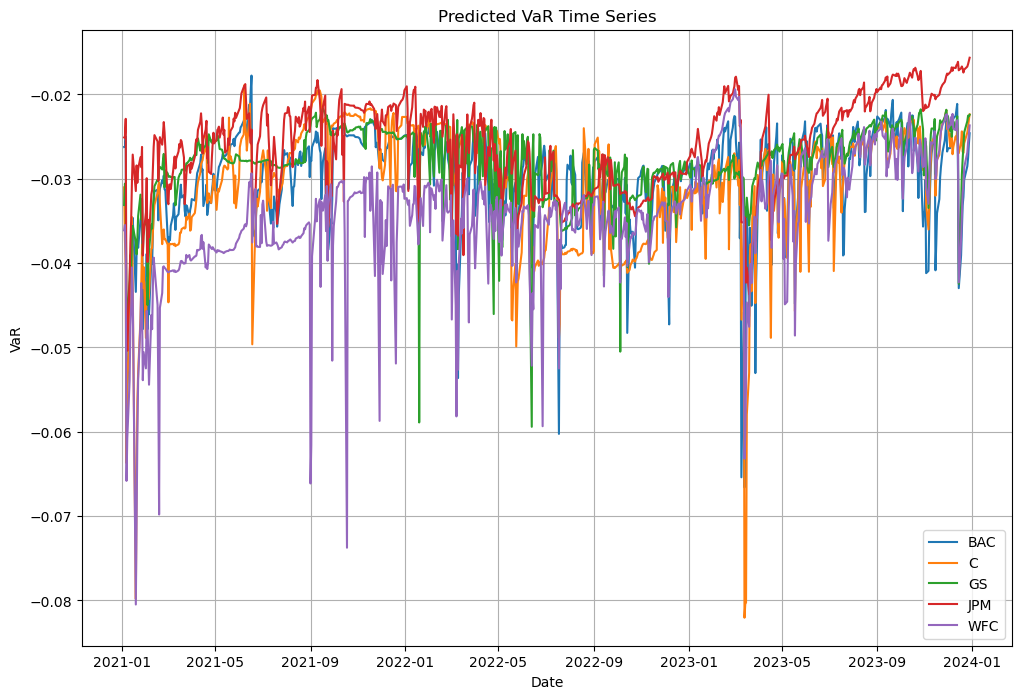

In [131]:
# Plot the time series of VaR for each company
plt.figure(figsize=(12, 8))
for ticker in predicted_var.columns:
    plt.plot(predicted_var.index, predicted_var[ticker], label=ticker)

plt.title("Predicted VaR Time Series")
plt.xlabel("Date")
plt.ylabel("VaR")
plt.legend()
plt.grid()
plt.show()


To improve the accuracy of Value at Risk (VaR) prediction, several enhancements can be considered. First, more advanced volatility models like EGARCH or APARCH could be used, as they capture asymmetry and leverage effects in returns more effectively than standard GARCH models. Additionally, experimenting with different window sizes and optimizing model parameters (p,q) can help better capture time-varying volatility dynamics. Second, incorporating exogenous variables, such as market indices or macroeconomic indicators, could enrich the dataset and improve model accuracy. Third, backtesting should be conducted to assess the adequacy of the predicted VaR. This process can identify model weaknesses, allowing for adjustments in the assumptions or structure of the model. Lastly, ensemble approaches that combine predictions from multiple models, such as weighted averages or machine learning-based blending, can mitigate biases and improve overall predictive performance. These strategies collectively enhance the reliability of VaR predictions in financial risk management.